In [2]:
import pandas as pd

#### Reading csv file

In [45]:
data = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")


data["batting_team"] = data["batting_team"].replace('Rising Pune Supergiants','Rising Pune Supergiant')
data["bowling_team"] = data["bowling_team"].replace('Rising Pune Supergiants','Rising Pune Supergiant')
data["batting_team"] = data["batting_team"].replace('Delhi Daredevils','Delhi Capitals')
data["bowling_team"] = data["bowling_team"].replace('Delhi Daredevils','Delhi Capitals')

data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# Most Wickets

In [19]:
data['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [20]:

df=data[(data['is_wicket']==1) & (data["dismissal_kind"].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']))]
results = df.groupby("bowler").count()


In [21]:
import matplotlib.pyplot as plt

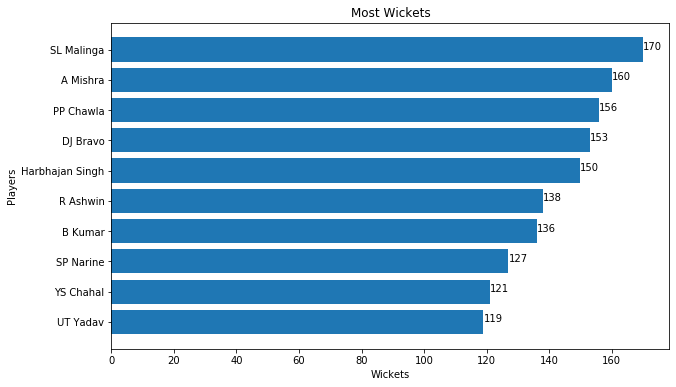

In [22]:
top10 = results.sort_values(by='id')["id"].tail(10)

players = top10.index

plt.figure(figsize=(10,6))
plt.barh(players,top10.values)
for index, value in enumerate(top10.values):
    plt.text(value, index, str(value))
plt.title('Most Wickets')
plt.xlabel('Wickets')
plt.ylabel('Players')
plt.savefig('Most Wickets.png', dpi=300, bbox_inches='tight')
plt.show()


# Runs on each Ball

In [12]:
df = data[data['is_wicket']!=1]
results = df.groupby("batsman_runs").count()
results["id"]

batsman_runs
0    68449
1    71645
2    12395
3      616
4    21907
5       60
6     8901
Name: id, dtype: int64

# Most Sixes By Each Team

In [35]:
df = data[data["batsman_runs"]==6]
results = df.groupby("batting_team").count()

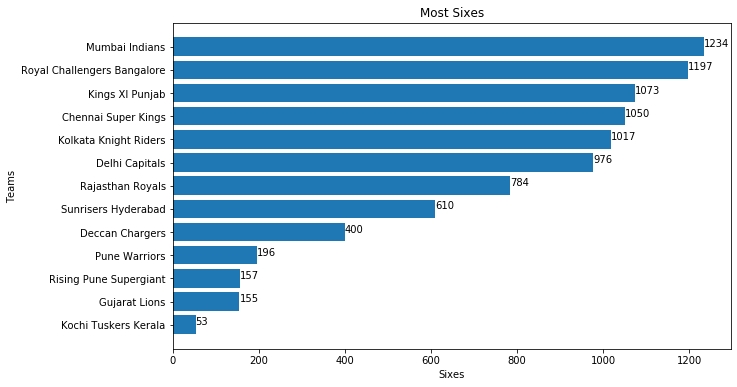

In [25]:
top10 = results.sort_values(by='id')["id"]

players = top10.index

plt.figure(figsize=(10,6))
plt.barh(players,top10.values)
for index, value in enumerate(top10.values):
    plt.text(value, index, str(value))
plt.title('Most Sixes')
plt.xlabel('Sixes')
plt.ylabel('Teams')
plt.savefig('Most Sixes By Teams.png', dpi=300, bbox_inches='tight')
plt.show()


# Most Sixes By Players

In [36]:
df = data[data["batsman_runs"]==6]
results = df.groupby("batsman").count()

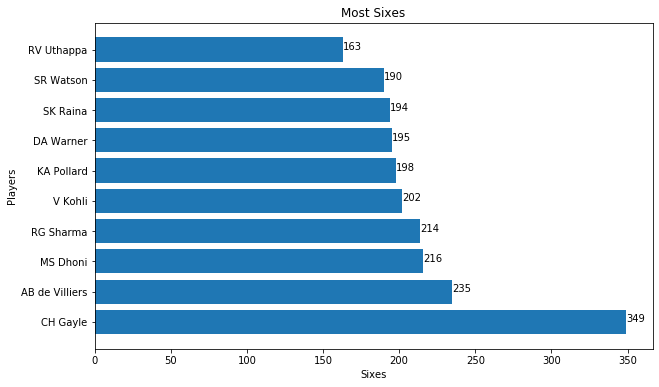

In [38]:
top10 = results.sort_values(by='id',ascending=False,)["id"].head(10)

players = top10.index

plt.figure(figsize=(10,6))
plt.barh(players,top10.values)
for index, value in enumerate(top10.values):
    plt.text(value, index, str(value))
plt.title('Most Sixes')
plt.xlabel('Sixes')
plt.ylabel('Players')
plt.savefig('Most Sixes By Players.png', dpi=300, bbox_inches='tight')
plt.show()

# Most 4's By Players

In [42]:
df = data[data["batsman_runs"]==4]
results = df.groupby("batsman").count()

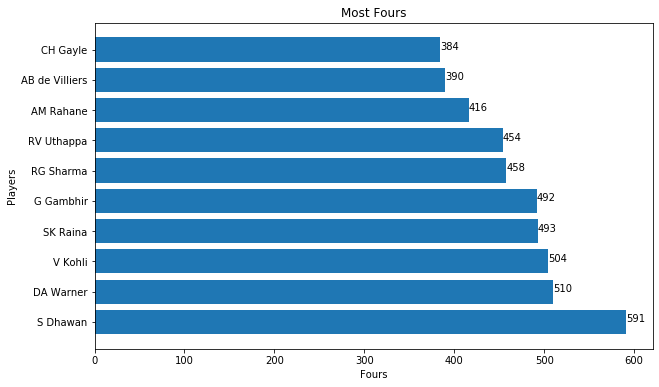

In [44]:
top10 = results.sort_values(by='id',ascending=False,)["id"].head(10)

players = top10.index

plt.figure(figsize=(10,6))
plt.barh(players,top10.values)
for index, value in enumerate(top10.values):
    plt.text(value, index, str(value))
plt.title('Most Fours')
plt.xlabel('Fours')
plt.ylabel('Players')
plt.savefig('Most Fours By Players.png', dpi=300, bbox_inches='tight')
plt.show()

# Most Runs by Players

In [64]:
df = data
results = df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)

,batsman,batsman_runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


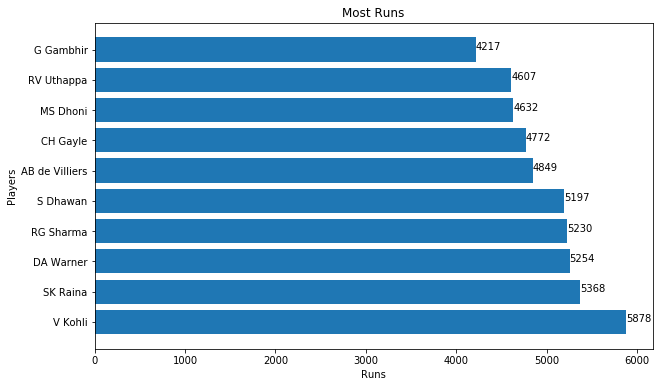

In [67]:
top10 = results

players = top10["batsman"]

plt.figure(figsize=(10,6))
plt.barh(players,top10["batsman_runs"])
for index, value in enumerate(top10["batsman_runs"]):
    plt.text(value, index, str(value))
plt.title('Most Runs')
plt.xlabel('Runs')
plt.ylabel('Players')
plt.savefig('Most Runs By Players.png', dpi=300, bbox_inches='tight')
plt.show()

# Wickets by type of Dismissal

In [101]:
df = data
results = df.groupby("dismissal_kind").count()
results["id"]

dismissal_kind
bowled                   1700
caught                   5743
caught and bowled         269
hit wicket                 12
lbw                       571
obstructing the field       2
retired hurt               11
run out                   893
stumped                   294
Name: id, dtype: int64

# Average Ball taken per boundary

In [83]:
(data[data['batsman_runs'].isin([4,6])].count()/data.count())

id                  0.159251
inning              0.159251
over                0.159251
ball                0.159251
batsman             0.159251
non_striker         0.159251
bowler              0.159251
batsman_runs        0.159251
extra_runs          0.159251
total_runs          0.159251
non_boundary        0.159251
is_wicket           0.159251
dismissal_kind      0.000211
player_dismissed    0.000211
fielder             0.000000
extras_type         0.013779
batting_team        0.159251
bowling_team        0.159227
dtype: float64

#### 0.16 = 1/6 = One boundary in each 6 ball.

# Highest Scores

In [104]:
highest_scores=data.groupby(['id','batting_team','bowling_team'])['total_runs'].sum().reset_index().sort_values(by="total_runs",ascending=False).head(10)
highest_scores

,id,batting_team,bowling_team,total_runs
701,598027,Royal Challengers Bangalore,Pune Warriors,263
1117,980987,Royal Challengers Bangalore,Gujarat Lions,248
292,419137,Chennai Super Kings,Rajasthan Royals,246
1355,1136604,Kolkata Knight Riders,Kings XI Punjab,245
2,335983,Chennai Super Kings,Kings XI Punjab,240
1001,829795,Royal Challengers Bangalore,Mumbai Indians,235
472,501260,Kings XI Punjab,Royal Challengers Bangalore,232
1480,1178422,Kolkata Knight Riders,Mumbai Indians,232
398,501223,Delhi Capitals,Kings XI Punjab,231
1409,1175366,Sunrisers Hyderabad,Royal Challengers Bangalore,231
